## Practica 9 (Motor de recomendaciones de Netflix)
Aldo Tolentino Domingo -> 220700


In [1]:
import numpy as np  #NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.
import pandas as pd  #pandas is a popular Python-based data analysis toolkit. It presents a diverse range of utilities, ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array.
import matplotlib.pyplot as plt  #matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
import seaborn as sns  #Seaborn is a library in Python predominantly used for making statistical graphics. Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python. Visualization is the central part of Seaborn which helps in exploration and understanding of data.
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Cargar los tres datasets
df_original = pd.read_csv("netflix_dataset.csv")
df_movies = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
df_shows = pd.read_csv("netflix_tv_shows_detailed_up_to_2025.csv")

# Unir los tres datasets en uno solo
netflix_dataset = pd.concat([df_original, df_movies, df_shows], ignore_index=True)

# (Opcional) Guardar el dataset completo como respaldo
netflix_dataset.to_csv("netflix_dataset_completo.csv", index=False)

# Mostrar las primeras filas para verificar
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,language,popularity,vote_count,vote_average,budget,revenue
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39787 entries, 0 to 39786
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       39787 non-null  object 
 1   type          39787 non-null  object 
 2   title         39787 non-null  object 
 3   director      26301 non-null  object 
 4   cast          37708 non-null  object 
 5   country       37018 non-null  object 
 6   date_added    39777 non-null  object 
 7   release_year  39787 non-null  int64  
 8   rating        39780 non-null  object 
 9   duration      23787 non-null  object 
 10  listed_in     7787 non-null   object 
 11  description   36449 non-null  object 
 12  genres        30919 non-null  object 
 13  language      32000 non-null  object 
 14  popularity    32000 non-null  float64
 15  vote_count    32000 non-null  float64
 16  vote_average  32000 non-null  float64
 17  budget        16000 non-null  float64
 18  revenue       16000 non-nu

In [4]:
#Identificar el número de valores únicos
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id              39381
type                     2
title                35803
director             15320
cast                 36939
country               2274
date_added            7069
release_year            77
rating                2742
duration               217
listed_in              492
description          35990
genres                3895
language                83
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327


In [5]:
# Valores Faltantes
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

Table of missing values: 
show_id             0
type                0
title               0
director        13486
cast             2079
country          2769
date_added         10
release_year        0
rating              7
duration        16000
listed_in       32000
description      3338
genres           8868
language         7787
popularity       7787
vote_count       7787
vote_average     7787
budget          23787
revenue         23787
dtype: int64


# Analisis Exploratorio de Datos (EDA)

## Analisis de Peliculas vs Programas de TV

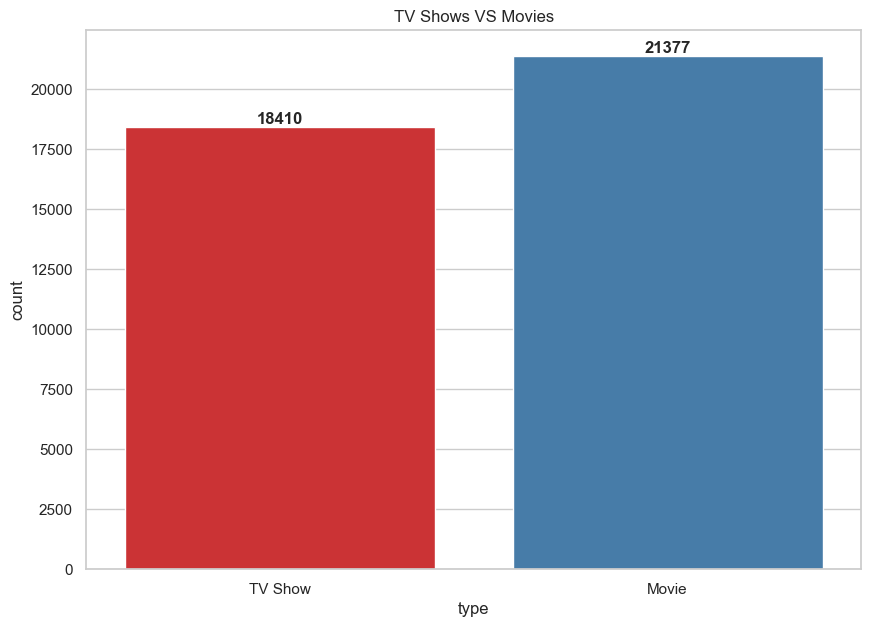

In [ ]:
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=netflix_dataset, palette="Set1")
ax.set_title("TV Shows VS Movies")


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

En que mes un producto puede publicar su contenido

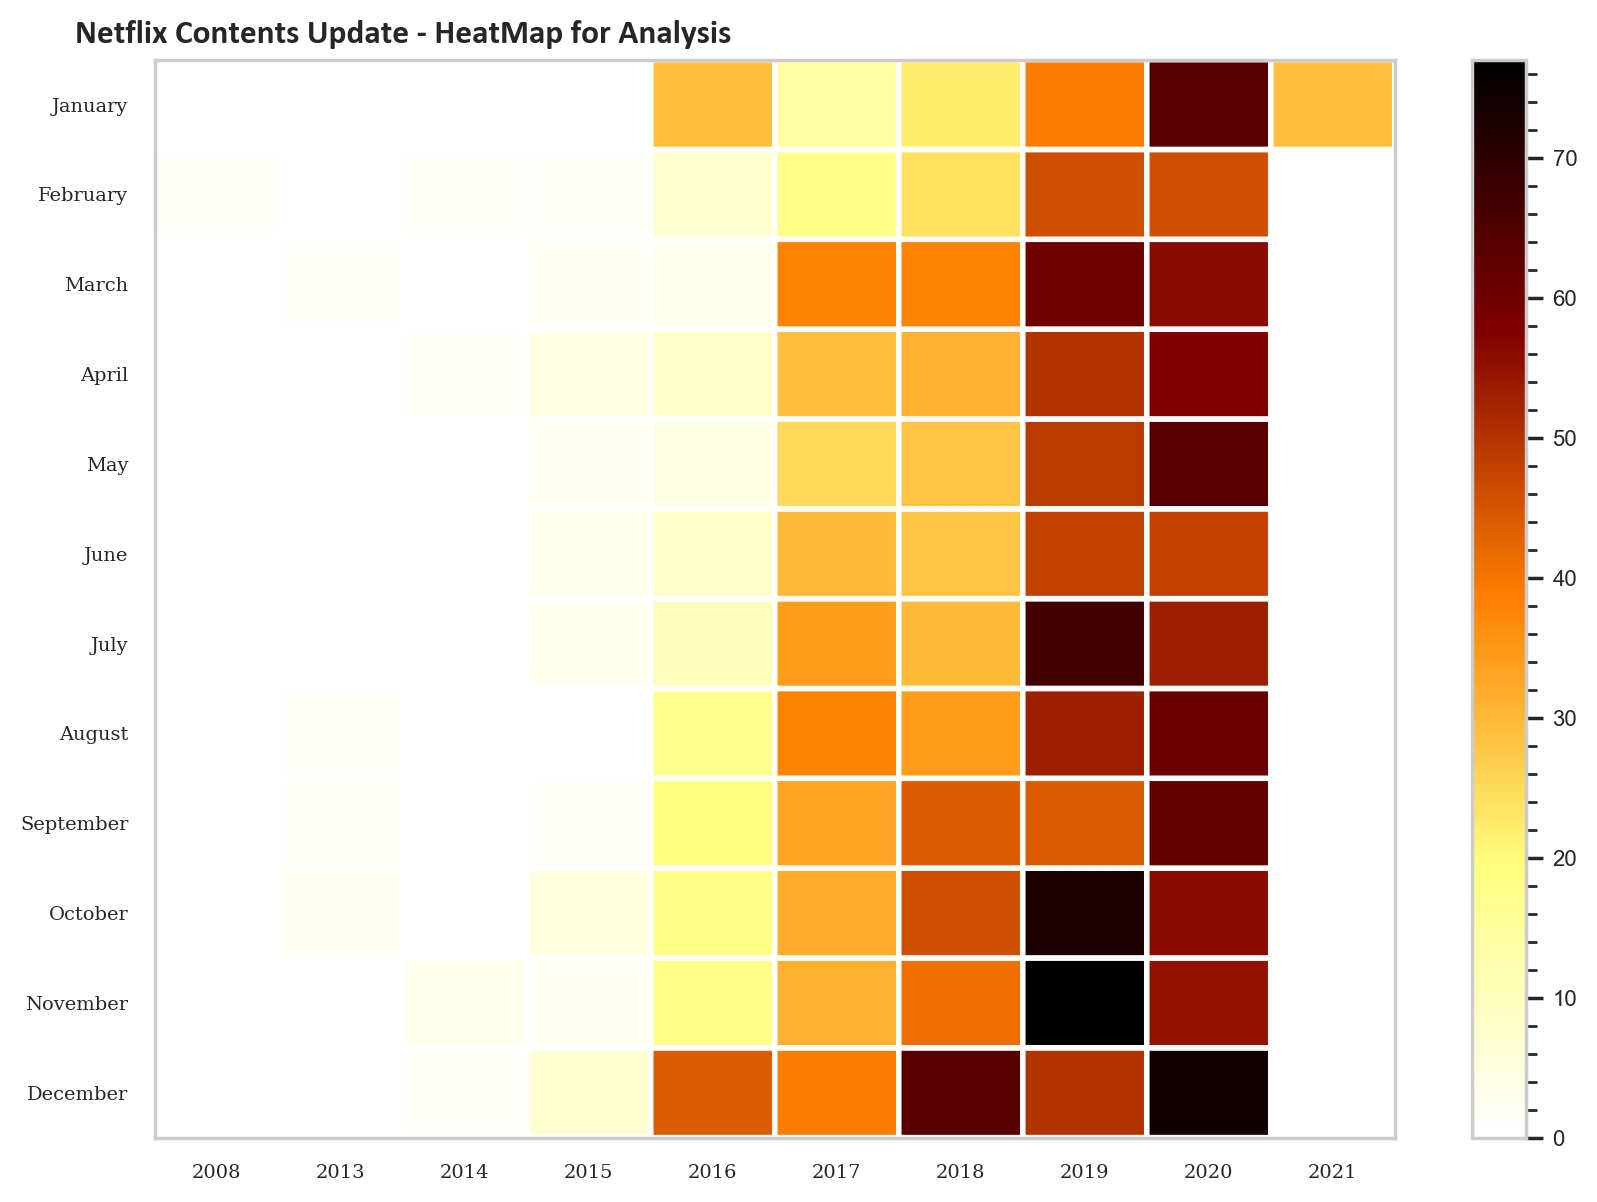

In [7]:

netflix_date = netflix_shows[['date_added']].dropna().copy()

def extract_year(date):
    try:
        return date.split(', ')[-1].strip()
    except Exception:
        return None

def extract_month(date):
    try:
        return date.strip().split(' ')[0]
    except Exception:
        return None

netflix_date['year'] = netflix_date['date_added'].apply(extract_year)
netflix_date['month'] = netflix_date['date_added'].apply(extract_month)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix_date = netflix_date[netflix_date['month'].isin(month_order)]

if netflix_date.empty:
    print("No hay datos válidos para graficar.")
else:
    df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
    plt.figure(figsize=(10, 7), dpi=200)
    plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
    plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8) 
    cbar.ax.minorticks_on()
    plt.show()

# Analisis de calificaciones de peliculas

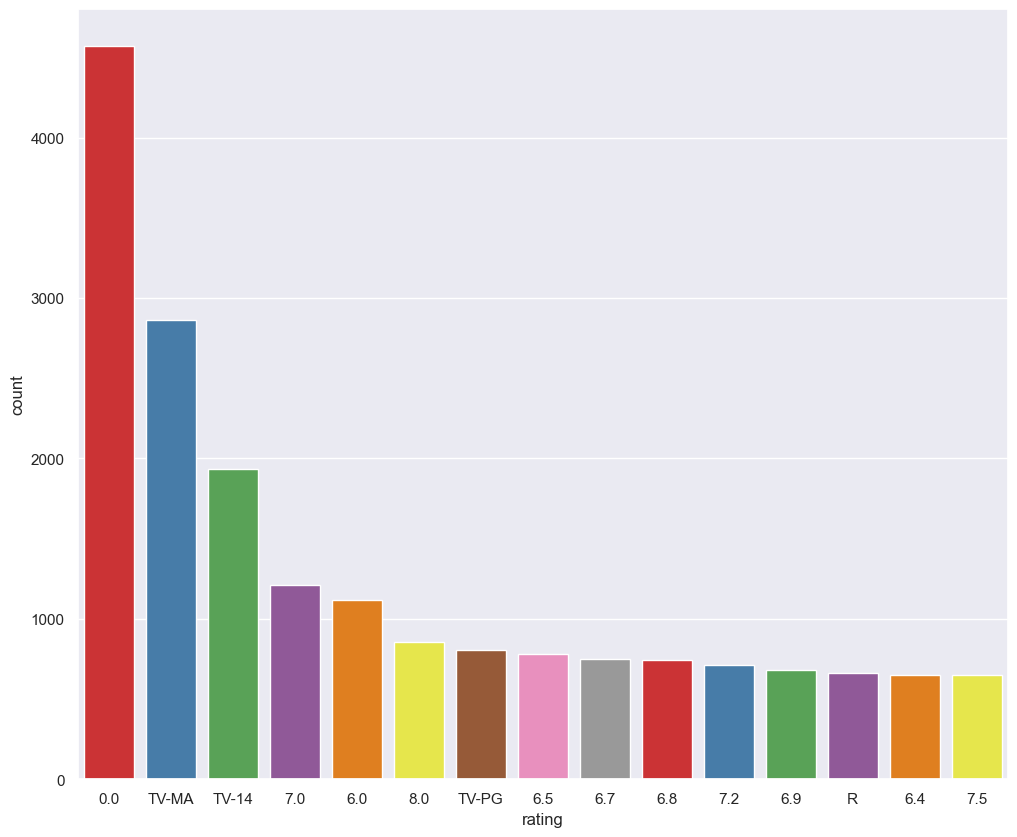

In [8]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])

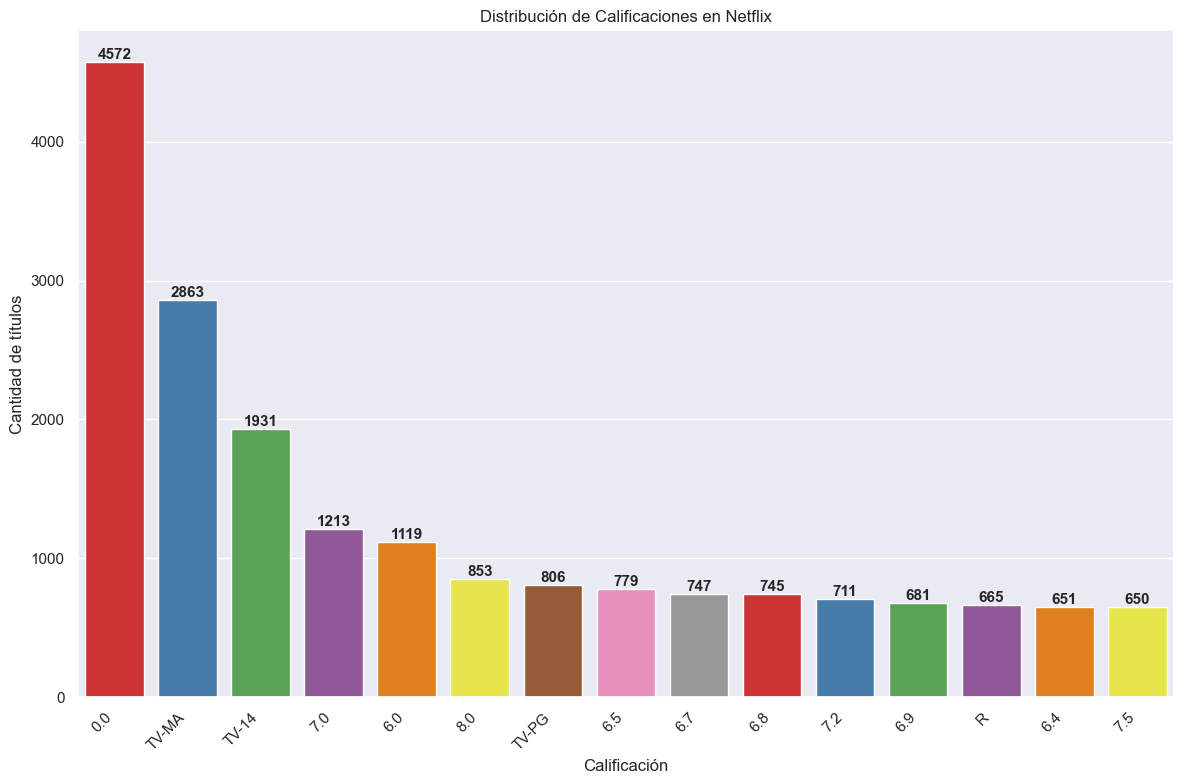

In [ ]:
# 2025
# Análisis de calificaciones de películas (Movie ratings analysis)
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
ax = sns.countplot(
    x="rating",
    data=netflix_dataset,
    palette="Set1",
    order=netflix_dataset['rating'].value_counts().index[:15]
)
ax.set_title("Distribución de Calificaciones en Netflix")
ax.set_xlabel("Calificación")
ax.set_ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()

# Analisis de las calificaciones de IMDB para obtener las peliculas mejor valoradas en Netflix

In [9]:
imdb_ratings=pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [10]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [11]:
#Las 10 peliculas mejor valoradas en Netflix
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

# Principales paises creadores de contenido

In [12]:
#Top countries creating contents
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States of America,2753
India,1023
United States,799
United Kingdom,489
South Korea,296
France,255
Canada,242
"United Kingdom, United States of America",200
Japan,185


# Analisis Anual

In [13]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,language,popularity,vote_count,vote_average,budget,revenue
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


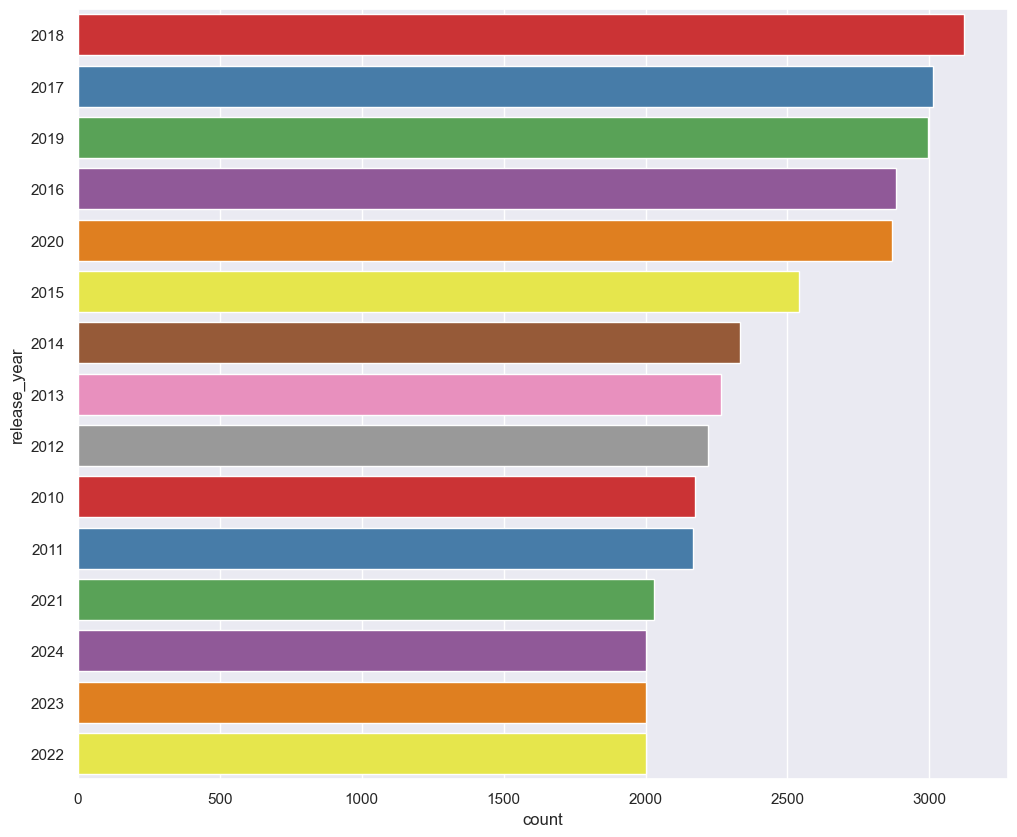

In [14]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset['release_year'].value_counts().index[0:15])

# Analisis de programas de TV en Netflix

In [15]:
#Analysis of TV Shows in Netflix

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [16]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStatesofAmerica'),
 Text(1, 0, 'UnitedKingdom'),
 Text(2, 0, 'Canada'),
 Text(3, 0, 'France'),
 Text(4, 0, 'UnitedStates'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'Mexico'),
 Text(7, 0, 'Japan'),
 Text(8, 0, 'SouthKorea'),
 Text(9, 0, 'Ireland')]

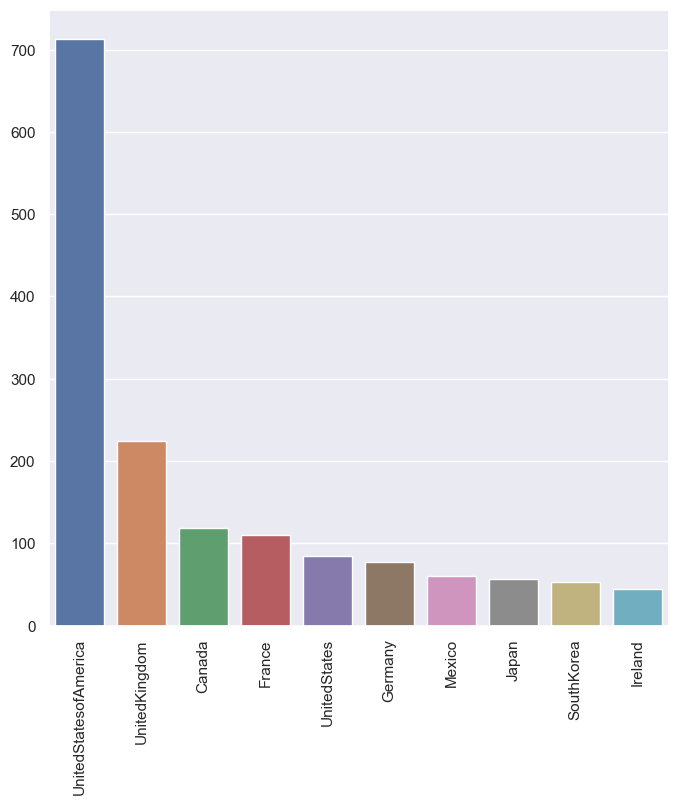

In [17]:
# Top 10 TV shows creating countries.

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

# Analisis de la duracion de peliculas

In [18]:
#Analysis of duration of movies

# Elimina ' min' y convierte a numérico, forzando errores a NaN
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '', regex=False)
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'], errors='coerce')

# Elimina filas con NaN en duration
netflix_movies = netflix_movies.dropna(subset=['duration'])

# Convierte a int
netflix_movies['duration'] = netflix_movies['duration'].astype(int)

netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

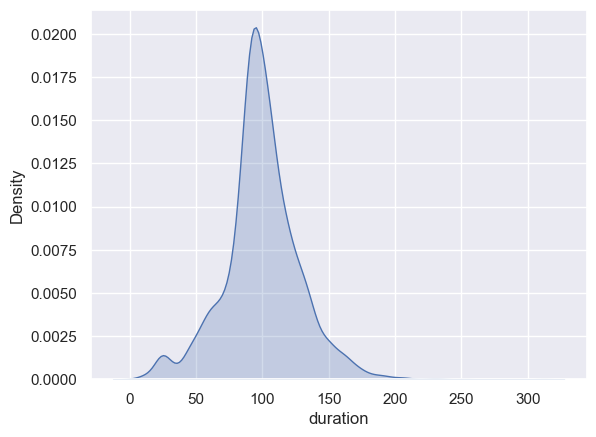

In [19]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

# Analisis de duracion de programas de TV

In [20]:
#Analysis of duration of TV shows

features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [21]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [22]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

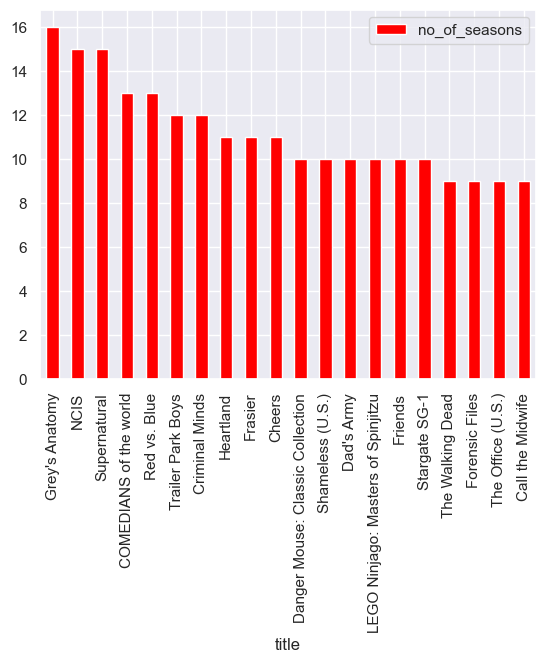

In [23]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

# Cosas nuevas agregadas

In [ ]:
#PASO 16
# Importacion de la librería de TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Creando el vector de todas las palabras contenidas en la descripción de cada contenido, limpiando palabras vacías en inglés
netflix_dataset['description'] = netflix_dataset['description'].fillna('')

# Creamos el vectorizador TF-IDF, eliminando palabras vacías en inglés
tfidf = TfidfVectorizer(stop_words='english')

# Ajustamos y transformamos la columna 'description'
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])

print("Shape de la matriz TF-IDF:", tfidf_matrix.shape)
print("Palabras (features) extraídas:", tfidf.get_feature_names_out()[:20], "...")
print("Ejemplo de vector TF-IDF para el primer título:\n", tfidf_matrix[0].toarray())

Shape de la matriz TF-IDF: (39787, 57065)
Palabras (features) extraídas: ['00' '000' '000ft' '007' '0079' '009' '0096' '00am' '00pm' '01' '012'
 '016' '02' '029' '03' '05' '06' '0mhz' '10' '100'] ...
Ejemplo de vector TF-IDF para el primer título:
 [[0. 0. 0. ... 0. 0. 0.]]


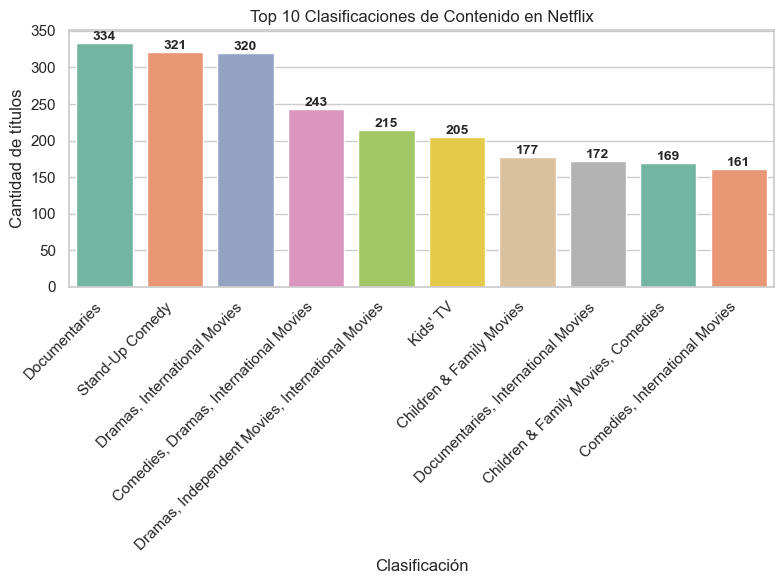

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
ax = sns.countplot(x="listed_in", data=netflix_dataset, order=netflix_dataset['listed_in'].value_counts().index[:10], palette="Set2")
ax.set_title("Top 10 Clasificaciones de Contenido en Netflix")
ax.set_xlabel("Clasificación")
ax.set_ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

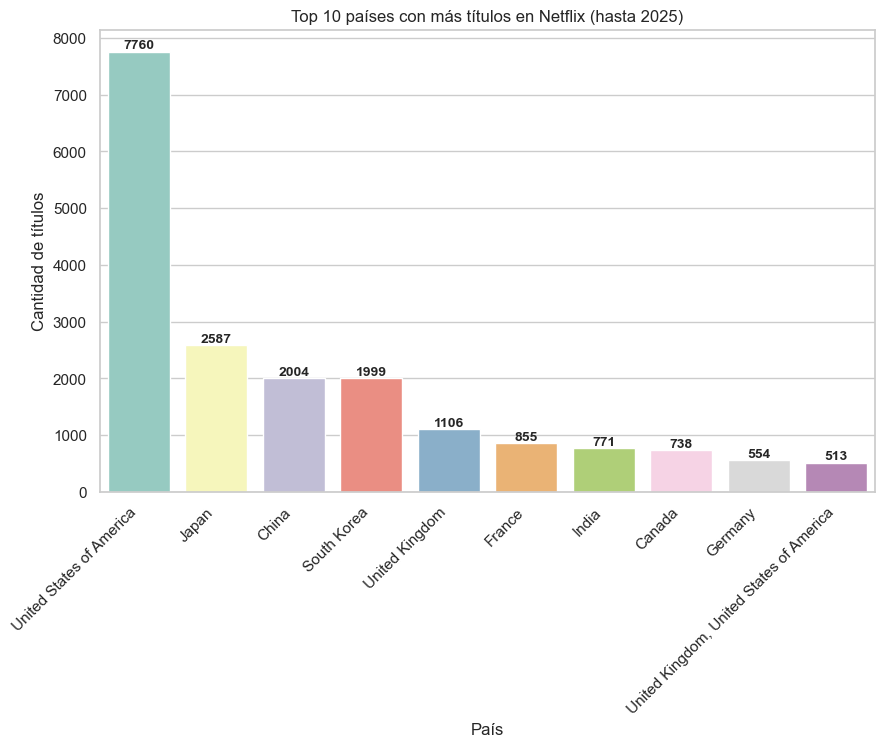

In [26]:
# 2025
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo los datos de películas y programas de TV detallados hasta 2025
df_movies = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
df_shows = pd.read_csv("netflix_tv_shows_detailed_up_to_2025.csv")

# Concatenar ambos para análisis conjunto
df_2025 = pd.concat([df_movies, df_shows], ignore_index=True)

# Graficar los 10 países con más títulos en el dataset 2025
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
top_countries = df_2025['country'].value_counts().dropna().head(10)
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette="Set3")
ax.set_title("Top 10 países con más títulos en Netflix (hasta 2025)")
ax.set_xlabel("País")
ax.set_ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha='right')

# Etiquetas de totales
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

In [ ]:
#PASO 10
import pandas as pd

# 1. Cargar datasets
netflix = pd.read_csv("netflix_dataset.csv", usecols=["title"])
imdb_movies = pd.read_csv("IMDb movies.csv", usecols=["title"])
imdb_ratings = pd.read_csv("IMDb ratings.csv", usecols=["weighted_average_vote"])

# 2. Combinar datasets IMDb
imdb_combined = pd.concat([imdb_movies, imdb_ratings], axis=1).drop_duplicates(subset=["title"])

# 3. Unir con los títulos de Netflix
netflix_imdb_rated = pd.merge(netflix, imdb_combined, on="title", how="inner")

# 4. Renombrar columna
netflix_imdb_rated.rename(columns={"weighted_average_vote": "imdb_rating"}, inplace=True)

# 5. Guardar CSV final
netflix_imdb_rated.to_csv("netflix_imdb_ratings.csv", index=False)

# 6. Ver primeras filas
netflix_imdb_rated.head()

,title,imdb_rating
0,07:19,6.0
1,23:59,4.6
2,9,7.7
3,21,6.8
4,122,6.8


In [ ]:
#PASO 11
import pandas as pd
import plotly.express as px

# 1. Cargando el dataset
netflix = pd.read_csv("netflix_dataset.csv", usecols=["title", "country"])
imdb_movies = pd.read_csv("IMDb movies.csv", usecols=["title"])
imdb_ratings = pd.read_csv("IMDb ratings.csv", usecols=["weighted_average_vote"])

# 2. Combinar datasets IMDb
imdb_combined = pd.concat([imdb_movies, imdb_ratings], axis=1).drop_duplicates(subset=["title"])

# 3. Unir con los títulos de Netflix (agregando país)
netflix_imdb_rated = pd.merge(netflix, imdb_combined, on="title", how="inner")
# renombando la columna
netflix_imdb_rated.rename(columns={"weighted_average_vote": "imdb_rating"}, inplace=True)

# 5. Convertir a numérico y eliminar nulos
netflix_imdb_rated["imdb_rating"] = pd.to_numeric(netflix_imdb_rated["imdb_rating"], errors="coerce")
netflix_imdb_rated = netflix_imdb_rated.dropna(subset=["imdb_rating"])

# 6. Seleccionar las 10 series/películas mejor evaluadas
top10 = netflix_imdb_rated.sort_values(by="imdb_rating", ascending=False).head(10)

# 7. Gráfica de pastel
fig = px.sunburst(
    top10,
    path=['title', 'country'],
    values='imdb_rating',
    color='imdb_rating',
    color_continuous_scale='viridis',
    title="Top 10 series/películas mejor evaluadas en Netflix (IMDB) por país"
)
fig.show()

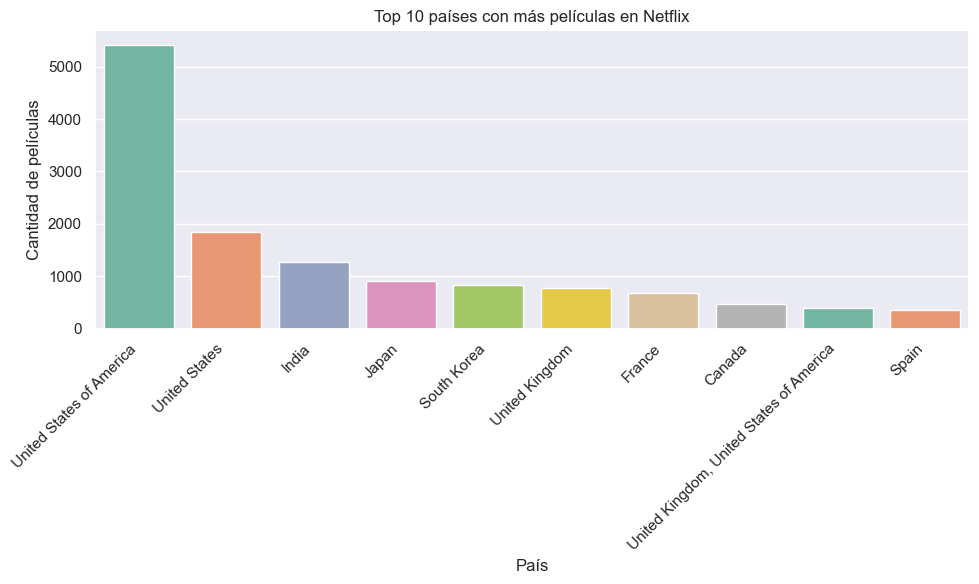

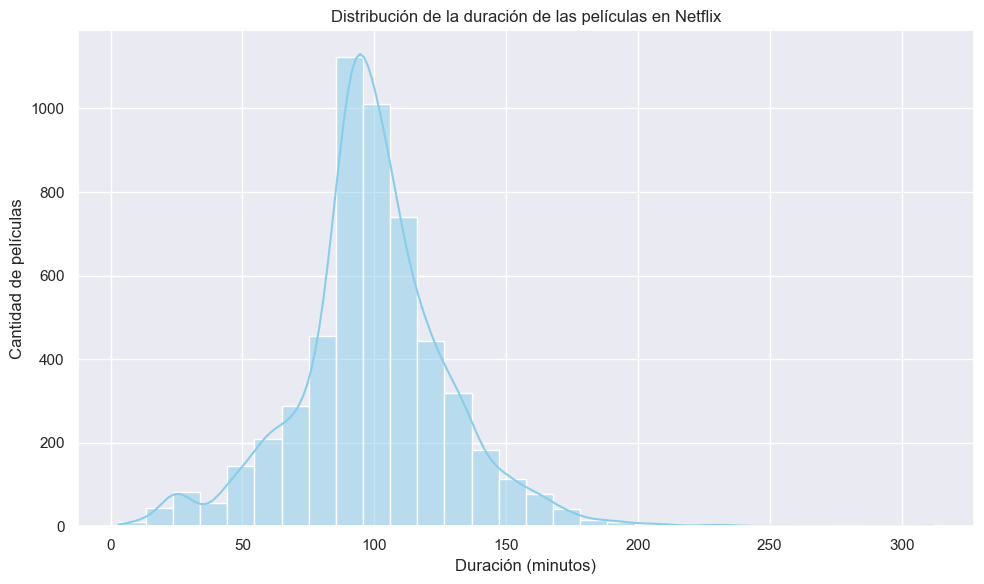

In [ ]:
# Punto 14
import matplotlib.pyplot as plt
import seaborn as sns

peliculas = netflix_dataset[netflix_dataset['type'] == 'Movie']
plt.figure(figsize=(10,6))
top_countries = peliculas['country'].value_counts().dropna().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Set2")
plt.title("Top 10 países con más películas en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

peliculas['duration'] = peliculas['duration'].astype(str).str.replace(' min', '', regex=False)
peliculas['duration'] = pd.to_numeric(peliculas['duration'], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(peliculas['duration'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribución de la duración de las películas en Netflix")
plt.xlabel("Duración (minutos)")
plt.ylabel("Cantidad de películas")
plt.tight_layout()
plt.show()

In [ ]:
#PASO 12
peliculas = netflix_dataset[netflix_dataset['type'] == 'Movie']
conteo_paises = peliculas['country'].value_counts().head(11)
print(conteo_paises)

country
United States of America                    5421
United States                               1850
India                                       1271
Japan                                        914
South Korea                                  825
United Kingdom                               774
France                                       681
Canada                                       466
United Kingdom, United States of America     401
Spain                                        349
Canada, United States of America             338
Name: count, dtype: int64


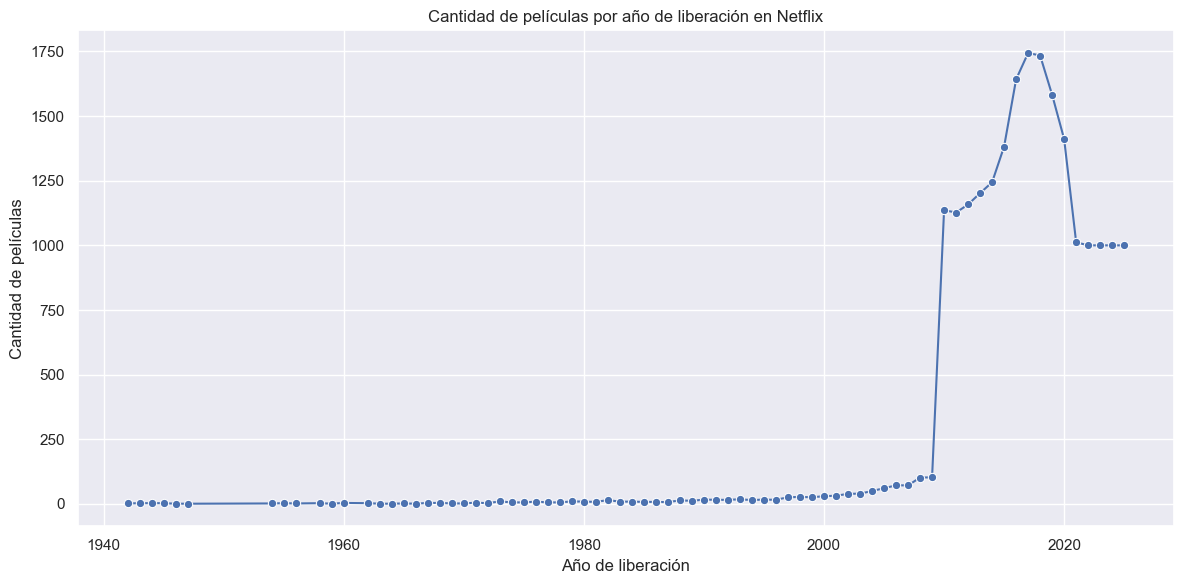

In [ ]:
# grafica de conteo por años DEL PASO 13
peliculas = netflix_dataset[netflix_dataset['type'] == 'Movie']
conteo_anios = peliculas['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=conteo_anios.index, y=conteo_anios.values, marker="o")
plt.title("Cantidad de películas por año de liberación en Netflix")
plt.xlabel("Año de liberación")
plt.ylabel("Cantidad de películas")
plt.tight_layout()
plt.show()

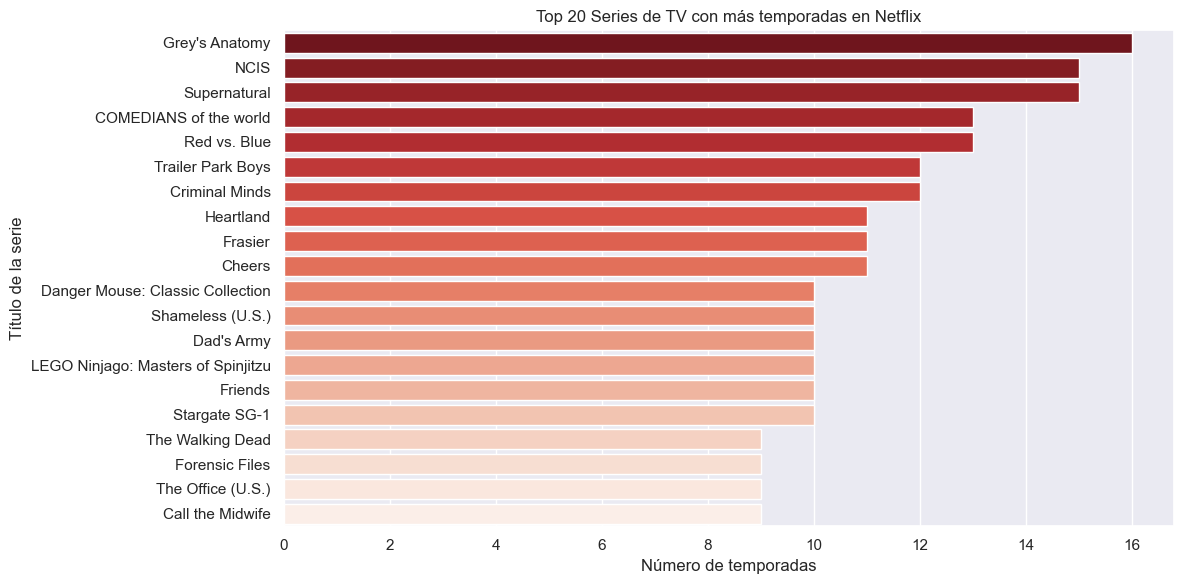

In [ ]:
# paso 15
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show']

netflix_shows['no_of_seasons'] = netflix_shows['duration'].str.replace(' Seasons', '', regex=False)
netflix_shows['no_of_seasons'] = netflix_shows['no_of_seasons'].str.replace(' Season', '', regex=False)
netflix_shows['no_of_seasons'] = pd.to_numeric(netflix_shows['no_of_seasons'], errors='coerce')

# Seleccionar las 20 series con más temporadas
top20 = netflix_shows[['title', 'no_of_seasons']].dropna().sort_values(by='no_of_seasons', ascending=False).head(20)

# Gráficacion
plt.figure(figsize=(12,6))
sns.barplot(x='no_of_seasons', y='title', data=top20, palette="Reds_r")
plt.title("Top 20 Series de TV con más temporadas en Netflix")
plt.xlabel("Número de temporadas")
plt.ylabel("Título de la serie")
plt.tight_layout()
plt.show()

In [ ]:
#punto 17
import pandas as pd
import numpy as np

# Cargar datasets
df_original = pd.read_csv("netflix_dataset.csv")
df_completo = pd.read_csv("netflix_dataset_completo.csv")

# Reemplazar strings vacíos o con espacios por NaN en la columna 'description'
df_original['description'] = df_original['description'].replace(r'^\s*$', np.nan, regex=True)
df_completo['description'] = df_completo['description'].replace(r'^\s*$', np.nan, regex=True)

df_original.to_csv("netflix_dataset_limpio.csv", index=False)
df_completo.to_csv("netflix_dataset_completo_limpio.csv", index=False)

# Verificar cuántos valores faltan
print("Original sin descripción:", df_original['description'].isna().sum())
print("Completo sin descripción:", df_completo['description'].isna().sum())

Original sin descripción: 0
Completo sin descripción: 3340
